# Анализ и прогнозирование временных рядов методами искусственного интеллекта

## **Практическая работа 5. Поиск типичных подпоследовательностей временного ряда.**

In [1]:
%load_ext autoreload
%autoreload 2

Импорт библиотек и модулей

In [2]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
import numpy as np
import matplotlib.pyplot as plt
from modules.snippets import *
from scipy import signal
from stumpy import snippets

D:\anaconda3\Lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
D:\anaconda3\Lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
D:\anaconda3\Lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


### **Задача 1. Поиск сниппетов одномерного временного ряда**

В первой задаче необходимо выполнить поиск сниппетов одномерного временного ряда. Расмотрите приведенный ниже пример использования алгоритма SnipperFinder и визуализации полученных результатов для искуственного врменного ряда.

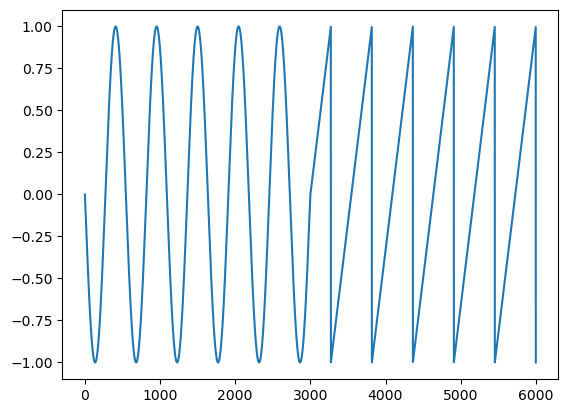

In [3]:
#Создание искусственного временного ряда
t = np.linspace(np.pi, 6 * 2 * np.pi, 3000)
ts = np.concatenate([np.sin(t), signal.sawtooth(t)])
plt.plot(ts)

In [4]:
#Поиск сниппетов
snp = snippets(ts, 600, 2, percentage=0.5)

600


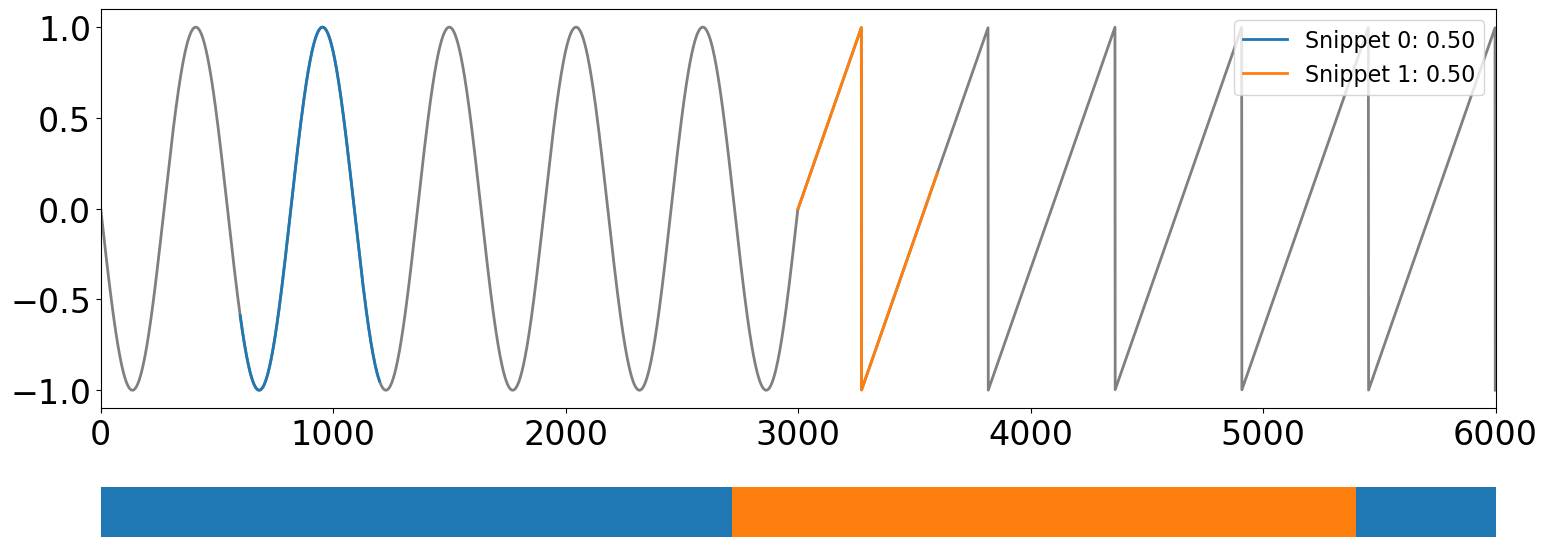

<Axes: >

In [5]:
#Визуализация результатов
plot_snippets(ts, snp)

Далее вам предстоит самостоятельно выполнить поиск top-$k$ типичных подпоследовательностей временного ряда (сниппетов) с помощью алгоритма SnippetFinder на наборе данных PAMAP. Описание набора данных находится в [README-файле](datasets/PAMAP/readme.md).

Выполните считывание временного ряда **показаний гироскопа на оси «Y» (угол тангажа) на временном интервале от 1790 сек. до 1930 сек.** (используя колонку с временными метками) из файла *PAMAP.txt*, который располагается в директории *./datasets/PAMAP*. Затем выполните поиск сниппетов с помощью функции `snippets()` из библиотеки stumpy. Затем визуализируйте полученные результаты, используя функцию `plot_snippets()` из модуля snippets.py.

In [6]:
import pandas as pd
import stumpy

# Загрузка данных
file_path = './datasets/PAMAP/PAMAP.txt'
data = pd.read_csv(file_path, delimiter=' ', header=None).T  # укажите правильный разделитель, если другой

data.columns = [f"col_{i}" for i in range(data.shape[1])]

# Проверим структуру данных
print(data.head())
print(f"Количество колонок: {data.shape[1]}")

# Извлекаем временной интервал с использованием индексов
time_interval = data.loc[(data['col_0']>=1790) & (data['col_0']<=1930)]
print(time_interval)

# Замените `col_X` на номер колонки для гироскопа по оси Y, когда станет известно, какой это столбец
# Например, если `col_9` соответствует `gyro_y`
gyro_y_series = time_interval['col_8'].values  # замените на корректный номер колонки

# Применение функции snippets() из stumpy
m=2
snippet_result = snippets(gyro_y_series, 600, m, percentage=0.5)

# Печать результата
print(snippet_result)

    col_0  col_1  col_2    col_3     col_4    col_5    col_6     col_7  \
0  505.71    2.0    NaN  35.0625  0.497271  9.08249 -1.87554  0.319610   
1  505.72    2.0    NaN  35.0625  0.693164  8.93258 -1.67790  0.379878   
2  505.73    2.0   79.0  35.0625  0.929013  9.04638 -1.44167  0.606483   
3  505.74    2.0    NaN  35.0625  1.039680  9.38386 -1.59565  0.772609   
4  505.75    2.0    NaN  35.0625  1.070930  9.38219 -1.82740  0.938327   

     col_8    col_9    col_10    col_11    col_12   col_13   col_14   col_15  \
0  9.10631 -1.64252 -0.064955  0.033557  0.051343  2.52139 -23.9094  3.66977   
1  8.90965 -1.41677  0.063998  0.052043  0.078401  2.12795 -23.8953  4.08997   
2  8.89380 -1.23683  0.192540  0.034474  0.070010  1.87388 -24.2730  4.23135   
3  8.99907 -1.23753  0.282665  0.053817  0.057465  1.73597 -23.3649  3.94322   
4  9.21025 -1.41926  0.335187  0.016476  0.011713  2.25530 -24.4165  4.65783   

     col_16    col_17    col_18    col_19  
0  0.636708 -0.766698  0.07324

Выполните визулизацию временного ряда и найденных сниппетов с помощью функции `plot_snippets()` из модуля snippets.py.

600


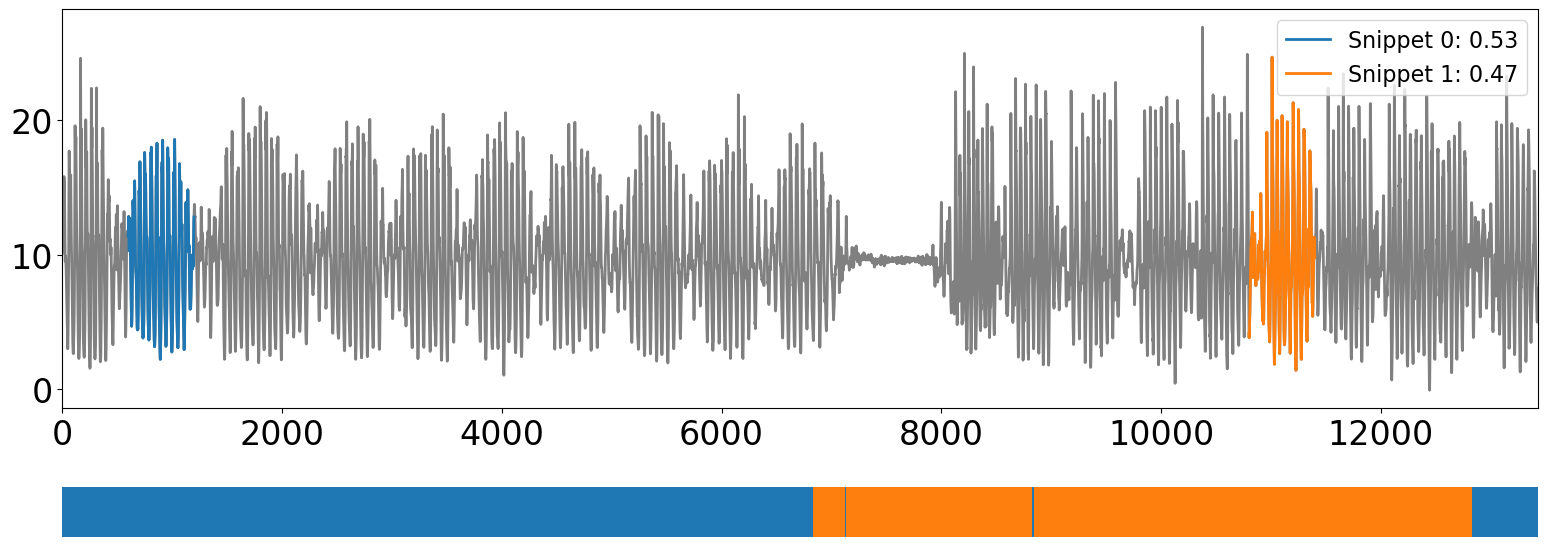

<Axes: >

In [7]:
plot_snippets(gyro_y_series, snippet_result)

Оцените точность разметки, полученной при помощи сниппетов, используя исходные данные об активностях в ряде.

In [8]:
from sklearn.metrics import accuracy_score
y_true=time_interval['col_1'].to_numpy()
y_true[y_true==12]=1
y_true[y_true==13]=2
y_true = np.where( (y_true != 12) & (y_true != 13), 0, y_true)
snippets_indices = snippet_result[1].astype(int)
labels = np.zeros(len(time_interval), dtype=int)
for i, snippet_start in enumerate(snippets_indices):
    snippet_end = snippet_start + 600
    labels[snippet_start:snippet_end] = i + 1  

print(labels)
accuracy_score(y_true, labels)

[0 0 0 ... 0 0 0]


0.9106478034251675

❓ Проанализируйте и изложите содержательный смысл полученных результатов.

Поиск сниппетов - это вполне эффективный способ для разделения временных рядов на подпоследовательности

### Задача 2. Разметка многомерного временного ряда

Выполните разметку многомерного временно ряда, используя **показания гироскопа по всем трем осям** из набора данных PAMAP. Используйте тот же временной интервал, что и в задаче 1. Итоговую разметку получите в результате голосования большинством.

In [9]:
# INSERT YOUR CODE

Оцените точность разметки многомерного ряда, используя исходные данные об активностях.

In [10]:
# INSERT YOUR CODE

❓ Проанализируйте и изложите содержательный смысл полученных результатов. Сравните полученные разметки многомерного и одномерного рядов.

## Задача 3. Подбор оптимального значения _k_


Разработайте программу, которая выполняет выполняет вычисление меры $change$ для различных значений $k$ с помощью алгоритма SnippetFinder. Проведите эксперименты, используя временной ряд из задания 2 (взяв 1 ≤ _k_ ≤ 9).

$Change_k = \frac{ProfileArea_{k-1}}{ProfileArea_k} - 1$

In [11]:
# INSERT YOUR CODE

Выполните визуализацию результатов экспериментов в следующем виде: отображение столбчатых диаграм со значениями $ProfileArea$ и меры $change$ в зависимости от $k$.

In [12]:
# INSERT YOUR CODE

❓ Проанализируйте и изложите содержательный смысл полученных результатов. Какое значение $k$ является наилучшим для используемого временного ряда?